In [1]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from numpy import nan
import seaborn as sns

In [246]:
#trainデータ読み込み
df1=pd.read_csv('train.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
#testデータ読み込み
df2=pd.read_csv('test.csv')
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#欠損値の確認
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df1.shape

(891, 12)

In [6]:
#欠損値の確認
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df2.shape

(418, 11)

In [8]:
#欠損値処理（1回目 dfi_1）　とりあえず平均で　
df1_1 = df1
df2_1 = df2
df1_1['Age'] = df1_1['Age'].fillna(df1_1['Age'].median())
df2_1['Age'] = df2_1['Age'].fillna(df2_1['Age'].median())
df1_1['Embarked'] = df1_1['Embarked'].fillna('S')
df2_1['Fare'] = df2_1['Fare'].fillna(df2_1['Fare'].median())

In [9]:
# エンコーディングを使い、ダミー変数を作成
a1 = pd.get_dummies(df1_1['Sex'])
a2 = pd.get_dummies(df2_1['Sex'])
print(a1.head())
print(' ')
print(a2.head())

   female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1
 
   female  male
0       0     1
1       1     0
2       0     1
3       0     1
4       1     0


In [10]:
# エンコーディングを使い、ダミー変数を作成
b1 = pd.get_dummies(df1_1['Embarked'])
b2 = pd.get_dummies(df2_1['Embarked'])
print(b1.head())
print(' ')
print(b2.head())

   C  Q  S
0  0  0  1
1  1  0  0
2  0  0  1
3  0  0  1
4  0  0  1
 
   C  Q  S
0  0  1  0
1  0  0  1
2  0  1  0
3  0  0  1
4  0  0  1


In [93]:
# Embarked,Sexの列を削除する
c1 = df1_1.drop(["PassengerId",'Embarked','Sex','Name','Ticket','Cabin'],axis=1)
c1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [94]:
# エンコーディングされたEmbarkedとSexの列を追加する
d1 = pd.concat([c1,a1,b1], axis=1)
d1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [95]:
# pdの列を並び替える
df1_1_1 = pd.DataFrame(d1,columns=["Survived","Pclass","male","female","Age","SibSp","Parch","Fare","C","Q","S"])
df1_1_1.head()

,Survived,Pclass,male,female,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,0,22.0,1,0,7.2500,0,0,1
1,1,1,0,1,38.0,1,0,71.2833,1,0,0
2,1,3,0,1,26.0,0,0,7.9250,0,0,1
3,1,1,0,1,35.0,1,0,53.1000,0,0,1
4,0,3,1,0,35.0,0,0,8.0500,0,0,1


In [96]:
# testデータも同様に処理
c2 = df2_1.drop(["PassengerId",'Embarked','Sex','Name','Ticket','Cabin'],axis=1)
d2 = pd.concat([c2,a2,b2], axis=1)
df2_1_1 = pd.DataFrame(d2,columns=["Pclass","male","female","Age","SibSp","Parch","Fare","C","Q","S"])
df2_1_1.head()

,Pclass,male,female,Age,SibSp,Parch,Fare,C,Q,S
0,3,1,0,34.5,0,0,7.8292,0,1,0
1,3,0,1,47.0,1,0,7.0000,0,0,1
2,2,1,0,62.0,0,0,9.6875,0,1,0
3,3,1,0,27.0,0,0,8.6625,0,0,1
4,3,0,1,22.0,1,1,12.2875,0,0,1


In [ ]:
# df(train=1,test=2) _ (欠損値処理i回目) _ (エンコーディングi回目) 

In [97]:
#欠損値確認
df1_1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [98]:
df2_1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [99]:
X1 = df1_1_1.drop('Survived', axis=1)
y = df1_1_1.Survived
from sklearn.model_selection import train_test_split
(X1_train, X1_test ,y_train, y_test) = train_test_split(X1, y, test_size = 0.3, random_state = 0)

In [100]:
# 決定木による学習
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state=0)
tree_1.fit(X1_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [101]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = tree_1.predict(X1_test)
fpr, tpr, thresholds = roc_curve(y_test, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, y_test)

0.77611940298507465

In [103]:
# .dotファイルをエクスポート
from sklearn.tree import export_graphviz
export_graphviz(tree_1, out_file='tree_1.dot', feature_names=['Pclass','male','female','Age','SibSp','Parch','Fare','C','Q','S'],
               class_names=['0', '1'], impurity=False, filled=True)

In [104]:
# 木構造を画像として出力
import cv2
img = cv2.imread('tree_1.png')
plt.figure(figsize=(12, 12))
plt.imshow(img)
plt.show()

ModuleNotFoundError: No module named 'cv2'

In [105]:
# 精度の確認
print('train: {:.3f}'.format(tree_1.score(X1_train, y_train)))
print('test : {:.3f}'.format(tree_1.score(X1_test, y_test)))

train: 0.979
test : 0.776


In [106]:
#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(tree_1, out_file=dot_data,feature_names=X1_train.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

In [107]:
# エラーで可視化できない
# 後で対処

In [108]:
# 決定木による学習（剪定）
# max_depthを指定
from sklearn.tree import DecisionTreeClassifier
tree_2 = DecisionTreeClassifier(random_state=0, max_depth=3)
tree_2.fit(X1_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [109]:
# 精度の確認
print('train: {:.3f}'.format(tree_2.score(X1_train, y_train)))
print('test : {:.3f}'.format(tree_2.score(X1_test, y_test)))

train: 0.836
test : 0.821


In [114]:
# ランダムフォレストによる学習
from sklearn.ensemble import RandomForestClassifier
rfc_1 = RandomForestClassifier(random_state=0, n_estimators=100)
rfc_1.fit(X1_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [115]:
# 正答率を出力
print('train accuracy: %.3f' % rfc_1.score(X1_train, y_train))
print('test  accuracy: %.3f' % rfc_1.score(X1_test, y_test))

train accuracy: 0.979
test  accuracy: 0.825


In [116]:
# 特徴量の重要度を出力
importances = rfc_1.feature_importances_
importances

array([ 0.08464854,  0.1430852 ,  0.14604083,  0.25385797,  0.05401591,
        0.033901  ,  0.2438621 ,  0.01443668,  0.01039767,  0.01575409])

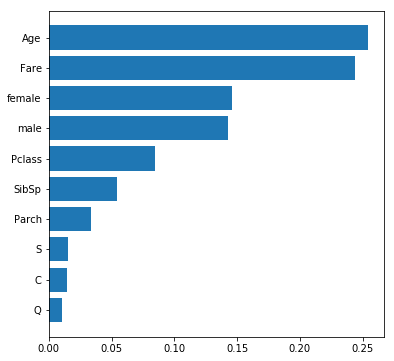

In [133]:
features = X1_train.columns
importances = rfc_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [119]:
# 勾配ブースティング木で学習させる
from sklearn.ensemble import GradientBoostingClassifier
gbct = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct.fit(X1_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [121]:
# 正答率を出力
print('train accuracy: %.3f' % gbct.score(X1_train, y_train))
print('test  accuracy: %.3f' % gbct.score(X1_test, y_test))

train accuracy: 0.910
test  accuracy: 0.847


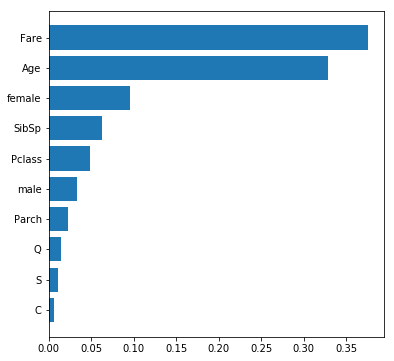

In [132]:
# 特徴量の重要度をグラフに出力
features = X1_train.columns
importances =gbct.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), features[indices])
plt.show()

In [ ]:
# 'Age'と'Fare'が重要度高い
# 'Age'の欠損値の埋め方を変えると、精度上がりそう

In [ ]:
# 一回、kaggleに提出 (勾配ブースティング木) 

In [140]:
X_test = df2_1_1
Survived = gbct.predict(X_test)
df_test = pd.DataFrame(Survived)
df_test.columns = ["Survived"]
df_id = df2.loc[:,'PassengerId']
submit_df = pd.concat([df_id, df_test], axis=1)
submit_df.head()
submit_df.to_csv("submit3.csv", index=False)

In [ ]:
# score : 0.77990
# 過学習気味

In [ ]:
# SVMで検証

In [141]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X1)
X1_std = scaler.transform(X1)

In [142]:
# ホールド・アウト法による分割
from sklearn.model_selection import train_test_split
X1_std_train, X1_std_test, y_train, y_test = train_test_split(X1_std, y, test_size=0.3, random_state=0)

In [143]:
# 線形SVCの学習
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X1_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [174]:
# 正答率を出力
print('train: %.3f' % svc.score(X1_std_train, y_train))
print('test: %.3f' % svc.score(X1_std_test, y_test))

train: 0.787
test: 0.787


In [ ]:
# 低い

In [158]:
# 線形SVCの学習
from sklearn.svm import SVC
svc_slack = SVC(kernel='linear', C=1.0)
svc_slack.fit(X1_std_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [173]:
# 正答率を出力
print('train: %.3f' % svc_slack.score(X1_std_train, y_train))
print('test: %.3f' % svc_slack.score(X1_std_test, y_test))

train: 0.787
test: 0.787


In [184]:
# カーネルSVMによる学習
# C: 誤分類への厳しさ
# gamma: 決定曲線の複雑さ
rbf_svm = SVC(kernel='rbf', gamma=0.1, C=1)
rbf_svm.fit(X1_std_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [185]:
# 正答率を出力
print('train: %.3f' % rbf_svm.score(X1_std_train, y_train))
print('test: %.3f' % rbf_svm.score(X1_std_test, y_test))

train: 0.846
test: 0.813


In [187]:
# 混合行列のarrayを作成
# (正解ラベル, 予測ラベル)
from sklearn.metrics import confusion_matrix
cm_1 = confusion_matrix(y_test, rbf_svm.predict(X1_std_test))
cm_1

array([[148,  20],
       [ 30,  70]])

In [188]:
# 混合行列をグラフでプロットする関数
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() # ラベルが重ならないように自動調整
    plt.show()

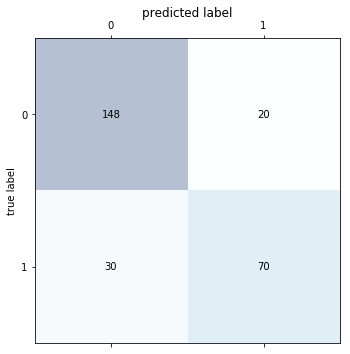

In [189]:
# 混同行列をグラフでプロット
plot_cm(cm_1)

In [190]:
# 調整したいパラメータを指定
param_grid = {'C': [0.1, 1.0, 10, 100, 1000, 10000],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

In [191]:
# データの分割方法を指定（層化）
from sklearn.model_selection import StratifiedKFold
kf_5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [194]:
# GridSearchCVのインスタンスを生成
from sklearn.model_selection import GridSearchCV
# (モデルのインスタンス, 試したいパラメータの値, 分割方法)
gs_svc = GridSearchCV(SVC(), param_grid, cv=kf_5)

In [195]:
# GridSearchCVを利用した学習
# 最適なパラメータを自動で採用した分類器となる
gs_svc.fit(X1_std_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [196]:
# test精度の平均が最も高かった組み合わせを出力
gs_svc.best_params_

{'C': 1.0, 'gamma': 0.1}

In [ ]:
# 辺や隅ではない、良さそうな値

In [197]:
# そのときのtest精度の平均を出力
gs_svc.best_score_

0.8234349919743178

In [ ]:
# 精度上げるには、前処理が大事
# 前処理について、試してみる
# 分析はランダムフォレストか、勾配ブースティング木が良さそうか

In [240]:
# 前処理2回目
df1_2=df1
df2_2=df2

In [241]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


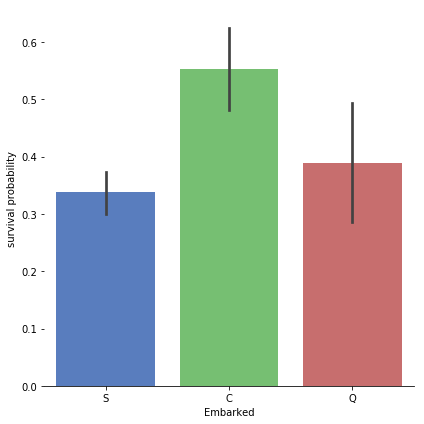

In [204]:
# Embarkedに順序関係があるか
g = sns.factorplot(x="Embarked", y="Survived", data=df1_2,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [ ]:
# 一見なさそう　ダミー変数にする

In [231]:
# 欠損値を埋める（'Embarked','Fare'）
df1_2['Embarked'] = df1_2['Embarked'].fillna('S')
df2_2['Fare'] = df2_2['Fare'].fillna(df2_2['Fare'].median())

In [242]:
# 'Sex'をエンコーディング
df1_2['Sex'] = df1_2['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df2_2['Sex'] = df2_2['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [247]:
df1_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [248]:
# 'Embarked'をエンコーディング
B1 = pd.get_dummies(df1_2['Embarked'])
B2 = pd.get_dummies(df2_2['Embarked'])

In [251]:
# 'Embarked','Ticket','Cabin'を削除
C1 = df1_2.drop(['Embarked','Ticket','Cabin'],axis=1)
C1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500


In [252]:
C2 = df2_2.drop(['Embarked','Ticket','Cabin'],axis=1)
C2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875


In [337]:
# エンコーディングされたEmbarkedの列を追加する
D1 = pd.concat([C1,B1], axis=1)
D1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,1


In [254]:
D2 = pd.concat([C2,B2], axis=1)
D2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,0,0,1


In [338]:
# 兄弟+親+自分=家族構成人数のカラムを作る
D1['Family'] = D1['SibSp'] + D1['Parch'] + 1
D2['Family'] = D2['SibSp'] + D2['Parch'] + 1

In [340]:
# 名前の敬称を抽出してカラムを作る
D1['Honorific'] = D1['Name']

In [341]:
for i,Name,Honorific in zip(range(891),D1.Name,D1.Honorific):
    if 'Mr.' in Name:
        D1['Honorific'][i] = 'Mr'
    elif 'Master.' in Name:
        D1['Honorific'][i] = 'Master'
    elif 'Mrs.' in Name:
        D1['Honorific'][i] = 'Mrs'
    elif 'Miss.' in Name:
        D1['Honorific'][i] = 'Miss'
    else:
        D1['Honorific'][i] = 'Others'

/Users/akizakimasato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/akizakimasato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/akizakimasato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pand

In [318]:
# 敬称ごとに抽出
D1_Mr = D1[D1.Honorific == 'Mr']
D1_Master = D1[D1.Honorific == 'Master']
D1_Mrs = D1[D1.Honorific == 'Mrs']
D1_Miss = D1[D1.Honorific == 'Miss']
D1_Others = D1[D1.Honorific == 'Others']

In [331]:
# 敬称ごとの平均
print(D1_Mr['Age'].mean())
print(D1_Master['Age'].mean())
print(D1_Mrs['Age'].mean())
print(D1_Miss['Age'].mean())
print(D1_Others['Age'].mean())

32.368090452261306
4.574166666666667
35.898148148148145
21.773972602739725
42.38461538461539


In [437]:
D1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,7.2500,0,0,1,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,71.2833,1,0,0,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,7.9250,0,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,53.1000,0,0,1,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,8.0500,0,0,1,1,Mr
5,6,0,3,"Moran, Mr. James",1,32.36809,0,0,8.4583,0,1,0,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,51.8625,0,0,1,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,21.0750,0,0,1,5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00000,0,2,11.1333,0,0,1,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00000,1,0,30.0708,1,0,0,2,Mrs


In [346]:
# 敬称ごとの平均で欠損値を埋めようとしたけど、失敗
# for i,Age,Honorific in zip(range(891),D1.Age,D1.Honorific):
#     if Honorific == 'Mr' and Age == 'NaN':
#         D1['Age'][i] = D1_Mr['Age'].mean()
#     elif Honorific == 'Master' and Age == 'NaN':
#         D1['Age'][i] = D1_Master['Age'].mean()
#     elif Honorific == 'Mrs' and Age == 'NaN':
#         D1['Age'][i] = D1_Mrs['Age'].mean()
#     elif Honorific == 'Miss' and Age == 'NaN':
#         D1['Age'][i] = D1_Miss['Age'].mean()
#     elif Honorific == 'Others' and Age == 'NaN':
#         D1['Age'][i] = D1_Others['Age'].mean()

In [349]:
# 他の人のコードを参考に、敬称ごとの平均で欠損値を埋める
D1[[True if "Mr" in i else False for i in D1.Honorific.values]] = D1[[True if "Mr" in i else False for i in D1.Honorific.values]].fillna(D1_Mr['Age'].mean())
D1[[True if "Master" in i else False for i in D1.Honorific.values]] = D1[[True if "Master" in i else False for i in D1.Honorific.values]].fillna(D1_Master['Age'].mean())
D1[[True if "Mrs" in i else False for i in D1.Honorific.values]] = D1[[True if "Mrs" in i else False for i in D1.Honorific.values]].fillna(D1_Mrs['Age'].mean())
D1[[True if "Miss" in i else False for i in D1.Honorific.values]] = D1[[True if "Miss" in i else False for i in D1.Honorific.values]].fillna(D1_Miss['Age'].mean())
D1[[True if "Others" in i else False for i in D1.Honorific.values]] = D1[[True if "Others" in i else False for i in D1.Honorific.values]].fillna(D1_Others['Age'].mean())

In [351]:
D1.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family,Honorific
0,1,0,3,"Braund, Mr. Owen Harris",1,22.00000,1,0,7.2500,0,0,1,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00000,1,0,71.2833,1,0,0,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.00000,0,0,7.9250,0,0,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00000,1,0,53.1000,0,0,1,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.00000,0,0,8.0500,0,0,1,1,Mr
5,6,0,3,"Moran, Mr. James",1,32.36809,0,0,8.4583,0,1,0,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.00000,0,0,51.8625,0,0,1,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.00000,3,1,21.0750,0,0,1,5,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.00000,0,2,11.1333,0,0,1,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.00000,1,0,30.0708,1,0,0,2,Mrs


In [407]:
# Nameを削除
df1_2_1=D1.drop(['Name'],axis=1)

In [408]:
df1_2_1.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family,Honorific
0,1,0,3,1,22.00000,1,0,7.2500,0,0,1,2,Mr
1,2,1,1,0,38.00000,1,0,71.2833,1,0,0,2,Mrs
2,3,1,3,0,26.00000,0,0,7.9250,0,0,1,1,Miss
3,4,1,1,0,35.00000,1,0,53.1000,0,0,1,2,Mrs
4,5,0,3,1,35.00000,0,0,8.0500,0,0,1,1,Mr
5,6,0,3,1,32.36809,0,0,8.4583,0,1,0,1,Mr
6,7,0,1,1,54.00000,0,0,51.8625,0,0,1,1,Mr
7,8,0,3,1,2.00000,3,1,21.0750,0,0,1,5,Master
8,9,1,3,0,27.00000,0,2,11.1333,0,0,1,3,Mrs
9,10,1,2,0,14.00000,1,0,30.0708,1,0,0,2,Mrs


In [355]:
# 欠損値確認
df1_2_1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
Family         0
Honorific      0
dtype: int64

In [409]:
# testデータも同様に処理

# 名前の敬称を抽出してカラムを作る
D2['Honorific'] = D2['Name']
for i,Name,Honorific in zip(range(418),D1.Name,D1.Honorific):
    if 'Mr.' in Name:
        D2['Honorific'][i] = 'Mr'
    elif 'Master.' in Name:
        D2['Honorific'][i] = 'Master'
    elif 'Mrs.' in Name:
        D2['Honorific'][i] = 'Mrs'
    elif 'Miss.' in Name:
        D2['Honorific'][i] = 'Miss'
    else:
        D2['Honorific'][i] = 'Others'
        
# 敬称ごとに抽出
D2_Mr = D2[D2.Honorific == 'Mr']
D2_Master = D2[D2.Honorific == 'Master']
D2_Mrs = D2[D2.Honorific == 'Mrs']
D2_Miss = D2[D2.Honorific == 'Miss']
D2_Others = D2[D2.Honorific == 'Others']

# # 敬称ごとの平均　（trainデータの平均を使う）
# print(D2_Mr['Age'].mean())
# print(D2_Master['Age'].mean())
# print(D2_Mrs['Age'].mean())
# print(D2_Miss['Age'].mean())
# print(D2_Others['Age'].mean())

# 敬称ごとの平均で欠損値を埋める
D2[[True if "Mr" in i else False for i in D2.Honorific.values]] = D2[[True if "Mr" in i else False for i in D2.Honorific.values]].fillna(D1_Mr['Age'].mean())
D2[[True if "Master" in i else False for i in D2.Honorific.values]] = D2[[True if "Master" in i else False for i in D2.Honorific.values]].fillna(D1_Master['Age'].mean())
D2[[True if "Mrs" in i else False for i in D2.Honorific.values]] = D2[[True if "Mrs" in i else False for i in D2.Honorific.values]].fillna(D1_Mrs['Age'].mean())
D2[[True if "Miss" in i else False for i in D2.Honorific.values]] = D2[[True if "Miss" in i else False for i in D2.Honorific.values]].fillna(D1_Miss['Age'].mean())
D2[[True if "Others" in i else False for i in D2.Honorific.values]] = D2[[True if "Others" in i else False for i in D2.Honorific.values]].fillna(D1_Others['Age'].mean())

#Nameを削除
df2_2_1=D2.drop(['Name'],axis=1)

/Users/akizakimasato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/akizakimasato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/akizakimasato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [359]:
# 欠損値確認
df2_2_1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
C              0
Q              0
S              0
Family         0
Honorific      0
dtype: int64

In [410]:
df2_2_1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family,Honorific
0,892,3,male,34.5,0,0,7.8292,0,1,0,1,Mr
1,893,3,female,47.0,1,0,7.0000,0,0,1,2,Mrs
2,894,2,male,62.0,0,0,9.6875,0,1,0,1,Miss
3,895,3,male,27.0,0,0,8.6625,0,0,1,1,Mrs
4,896,3,female,22.0,1,1,12.2875,0,0,1,3,Mr


In [411]:
# Sexをエンコーディング　（できていなかったため）
df2_2_1['Sex'] = df2_2_1['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [412]:
df2_2_1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family,Honorific
0,892,3,1,34.5,0,0,7.8292,0,1,0,1,Mr
1,893,3,0,47.0,1,0,7.0000,0,0,1,2,Mrs
2,894,2,1,62.0,0,0,9.6875,0,1,0,1,Miss
3,895,3,1,27.0,0,0,8.6625,0,0,1,1,Mrs
4,896,3,0,22.0,1,1,12.2875,0,0,1,3,Mr


In [413]:
# Honorificをダミー変数に
E1 = pd.get_dummies(df1_2_1['Honorific'])
E2 = pd.get_dummies(df2_2_1['Honorific'])

F1 = df1_2_1.drop(['Honorific','PassengerId'],axis=1)
F2 = df2_2_1.drop(['Honorific','PassengerId'],axis=1)

df1_2_1 = pd.concat([F1,E1], axis=1)
df2_2_1 = pd.concat([F2,E2], axis=1)

In [439]:
df1_2_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family,Master,Miss,Mr,Mrs,Others
0,0,3,1,22.0,1,0,7.2500,0,0,1,2,0,0,1,0,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2,0,0,0,1,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,1,0,1,0,0,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,2,0,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,1,0,0,1,0,0


In [440]:
df2_2_1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,Family,Master,Miss,Mr,Mrs,Others
0,3,1,34.5,0,0,7.8292,0,1,0,1,0,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2,0,0,0,1,0
2,2,1,62.0,0,0,9.6875,0,1,0,1,0,1,0,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,1,0,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,3,0,0,1,0,0


In [414]:
X2 = df1_2_1.drop('Survived', axis=1)
y2 = df1_2_1.Survived
from sklearn.model_selection import train_test_split
(X2_train, X2_test ,y2_train, y2_test) = train_test_split(X2, y2, test_size = 0.3, random_state = 0)

In [415]:
# 決定木による学習
from sklearn.tree import DecisionTreeClassifier
tree_3 = DecisionTreeClassifier(random_state=0)
tree_3.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [416]:
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = tree_3.predict(X2_test)
fpr, tpr, thresholds = roc_curve(y2_test, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, y2_test)

0.77238805970149249

In [417]:
# 精度の確認
print('train: {:.3f}'.format(tree_3.score(X2_train, y2_train)))
print('test : {:.3f}'.format(tree_3.score(X2_test, y2_test)))

train: 0.982
test : 0.772


In [418]:
# 決定木による学習（剪定）
# max_depthを指定
from sklearn.tree import DecisionTreeClassifier
tree_4 = DecisionTreeClassifier(random_state=0, max_depth=3)
tree_4.fit(X2_train, y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [419]:
# 精度の確認
print('train: {:.3f}'.format(tree_4.score(X2_train, y2_train)))
print('test : {:.3f}'.format(tree_4.score(X2_test, y2_test)))

train: 0.831
test : 0.806


In [420]:
# ランダムフォレストによる学習
from sklearn.ensemble import RandomForestClassifier
rfc_2 = RandomForestClassifier(random_state=0, n_estimators=100)
rfc_2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [421]:
# 正答率を出力
print('train accuracy: %.3f' % rfc_2.score(X2_train, y2_train))
print('test  accuracy: %.3f' % rfc_2.score(X2_test, y2_test))

train accuracy: 0.982
test  accuracy: 0.810


In [435]:
# 勾配ブースティング木で学習させる
from sklearn.ensemble import GradientBoostingClassifier
gbct2 = GradientBoostingClassifier(random_state=0, max_depth=3, learning_rate=0.1)
gbct2.fit(X2_train, y2_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [436]:
# 正答率を出力
print('train accuracy: %.3f' % gbct2.score(X2_train, y2_train))
print('test  accuracy: %.3f' % gbct2.score(X2_test, y2_test))

train accuracy: 0.909
test  accuracy: 0.832


In [ ]:
# 1回目と比べてあまり上がっていない？

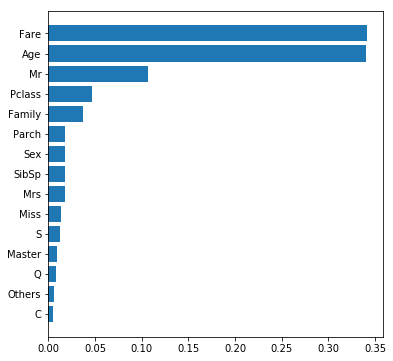

In [424]:
# 特徴量の重要度をグラフに出力
features2 = X2_train.columns
importances2 =gbct2.feature_importances_
indices2 = np.argsort(importances2)

plt.figure(figsize=(6,6))
plt.barh(range(len(indices2)), importances2[indices2], align='center')
plt.yticks(range(len(indices2)), features2[indices2])
plt.show()

In [438]:
# kaggle提出
X_test2 = df2_2_1
Survived2 = gbct2.predict(X_test2)
df_test2 = pd.DataFrame(Survived2)
df_test2.columns = ["Survived"]
submit_df2 = pd.concat([df_id, df_test2], axis=1)
submit_df2.head()
submit_df2.to_csv("submit2.csv", index=False)

In [ ]:
# score : 0.74162
# 1回目より下がった
# 1回目との違い
# ・Ageの欠損値をHonorificごとの平均で埋めた
# ・Familyカラムを追加した
# ・Honorificを追加した